In [1]:
import os

os.chdir("../..")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import tqdm.auto as tqdm
import matplotlib.pyplot as plt
import numpy as np

from modular_splicing.gtex_data.pipeline.splice_table import produce_splice_table
from modular_splicing.gtex_data.pipeline.gtex_data_table import (
    exon_junction_data,
    gene_expr_data,
)
from modular_splicing.gtex_data.experiments.create_dataset import MarginalPsiV3
from modular_splicing.gtex_data.experiments import tissue_groups
from modular_splicing.gtex_data.annotation.compute_psis_from_annotation import (
    compute_psis_all,
)

from modular_splicing.dataset.multi_tissue_h5_dataset import (
    MultiTissueProbabilitiesH5Dataset,
)
from modular_splicing.dataset.datapoint_extractor import BasicDatapointExtractor

from modular_splicing.utils.construct import construct
from modular_splicing.dataset.generic_dataset import dataset_types

from working.gtex_models import gtex_models
from modular_splicing.utils.run_batched import run_batched
from modular_splicing.models_for_testing.main_models import AM

In [4]:
from working.evaluate_gtex import *

In [5]:
models = [AM.rename("Cano"), *gtex_models]

In [6]:
results = evaluate_on_tissue_groups(
    [x for x in models if "blood" not in x.name], tissue_groups.main_tissue_groups_v1
)

In [7]:
results_blood = evaluate_on_tissue_groups(models, tissue_groups.just_whole_blood)

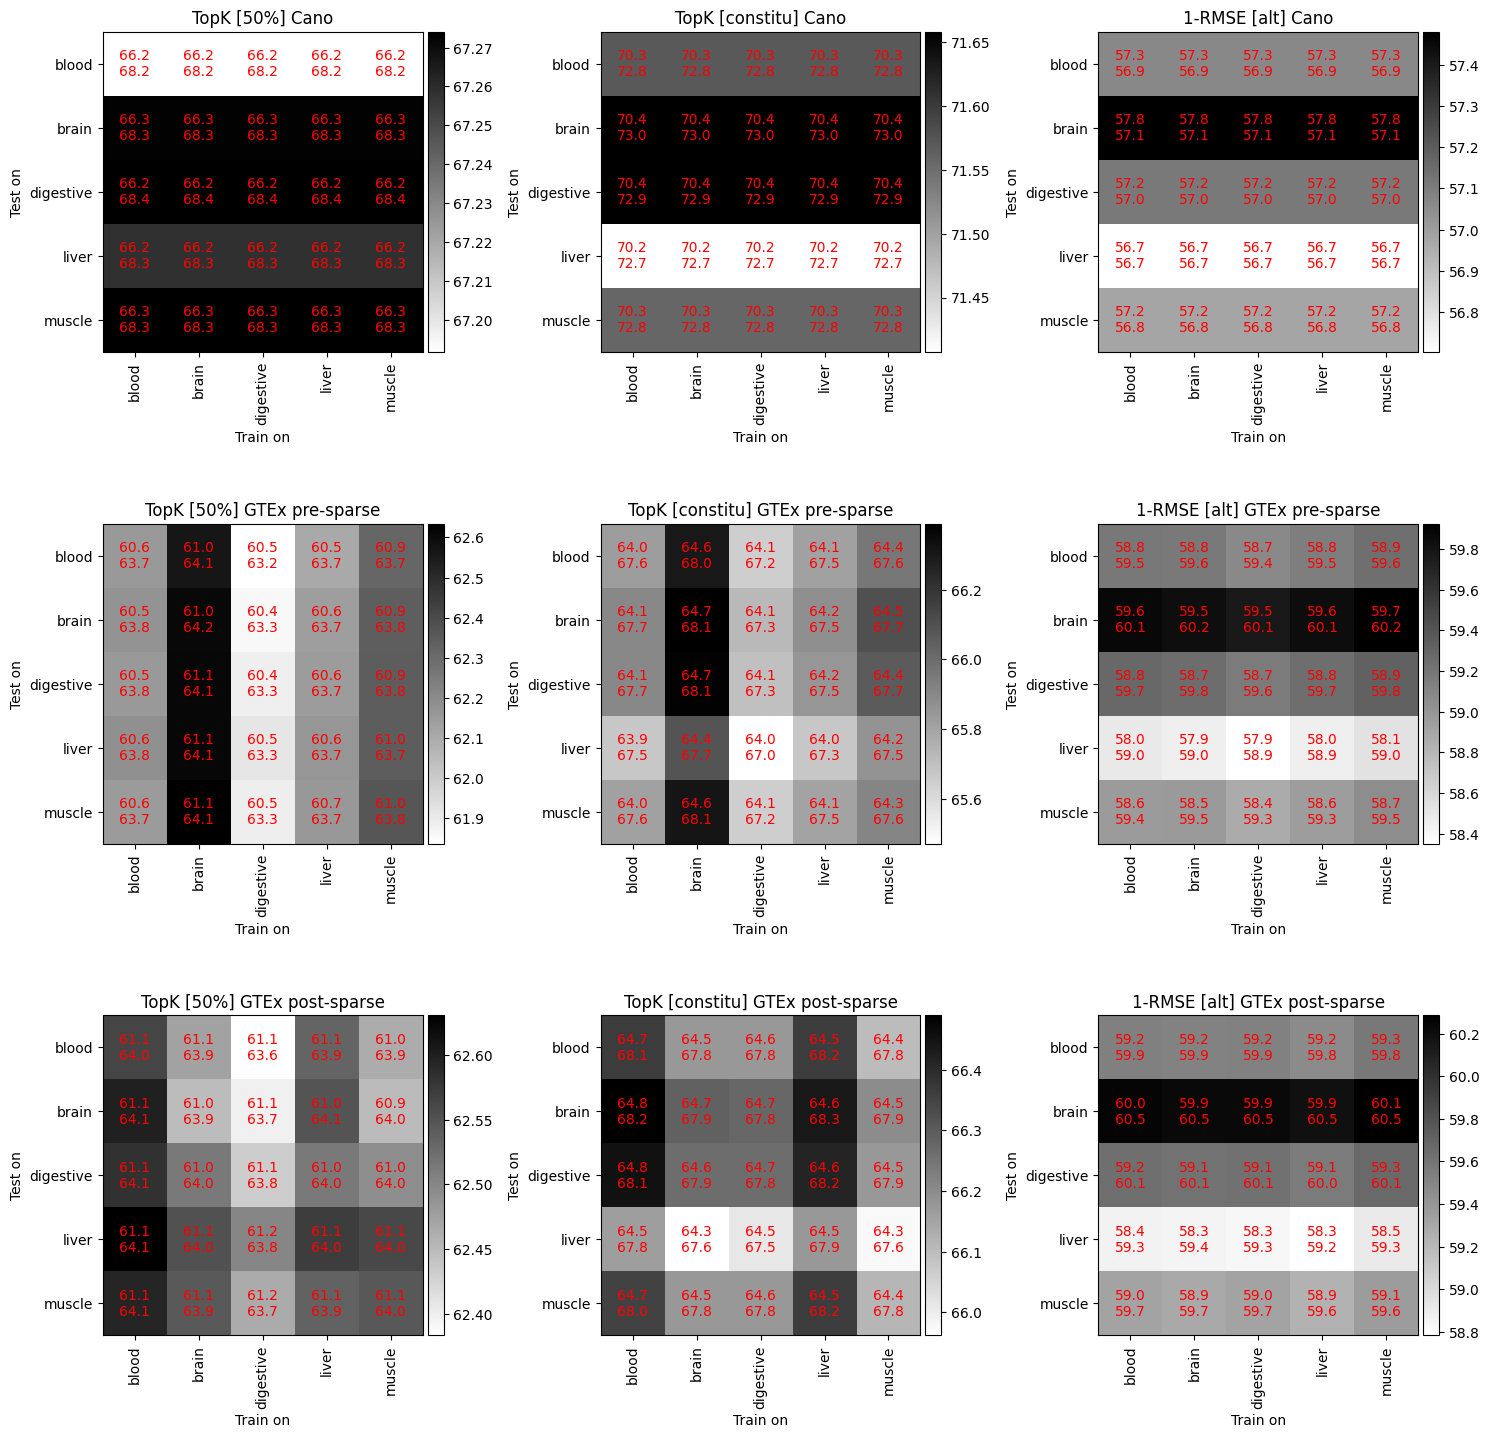

In [8]:
stats = [
    ("TopK [50%]", lambda res: res["topk"][0.5]),
    ("TopK [constitu]", lambda res: res["topk_constitu"]),
    ("1-RMSE [alt]", lambda res: 1 - res["rmse_alternative"]),
]
fig, axs = plt.subplots(
    len(results),
    len(stats),
    figsize=(len(stats) * 5, len(results) * 5),
    tight_layout=True,
)
if len(axs.shape) == 1:
    axs = [axs]
for mod_name, axs_row in zip(results, axs):
    for (name, stat), ax in zip(stats, axs_row):
        display_stats_matrix(
            name + " " + mod_name, tissue_groups.main_tissue_groups_v1, stat(results[mod_name]), fig, ax
        )

In [9]:
flat_results, advantages = flatten_results(results)

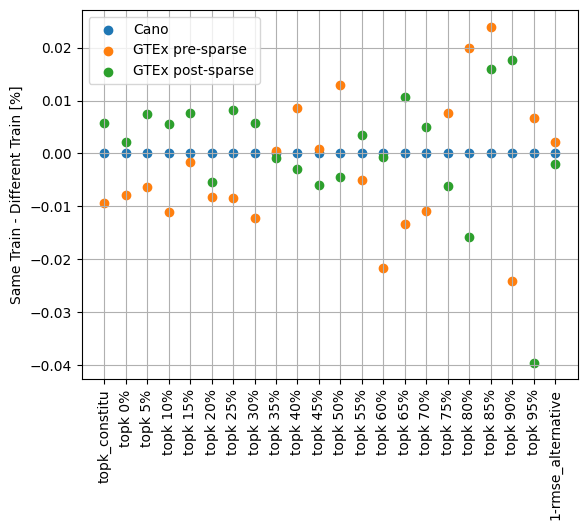

In [10]:
for m in results:
    plt.scatter(
        np.arange(len(advantages[m])),
        [100 * advantages[m][k] for k in advantages[m]],
        label=m,
    )
    plt.xticks(np.arange(len(advantages[m])), list(advantages[m]), rotation=90)
plt.grid()
plt.ylabel("Same Train - Different Train [%]")
plt.legend()
plt.show()

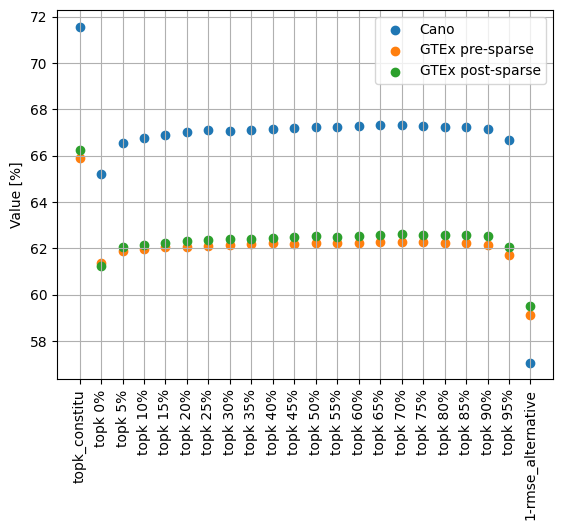

In [11]:
display_mean_results(flat_results)

In [12]:
flat_results_blood, _ = flatten_results(results_blood)

/mnt/md0/ExpeditionsCommon/spliceai/Canonical/working/evaluate_gtex.py:200: RuntimeWarning: Mean of empty slice.
  return matr[mask_same].mean() - matr[mask_diff].mean()
/scratch/kavig/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


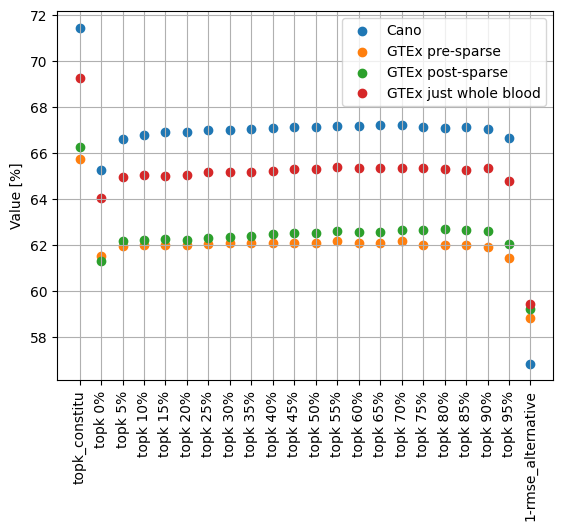

In [13]:
display_mean_results(flat_results_blood)